In [1]:
# -*- coding: utf-8 -*- #

# Write libraries here #########################################
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from jupyterthemes import jtplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, cluster, preprocessing, mixture
from time import time
from tqdm import tnrange, tqdm_notebook
%matplotlib inline
################################################################


# Showing 500 columns and rows #################################
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
################################################################


# NOT CHANGE (The PATH for directory) ##########################
CURRENT_DIR_NAME = os.path.dirname(os.path.abspath(__name__))
PATH_DATA = os.path.join(CURRENT_DIR_NAME, '../data/')
PATH_HIST = os.path.join(CURRENT_DIR_NAME, '../histogram/')
PATH_PLOT = os.path.join(CURRENT_DIR_NAME, '../plots/')
PATH_IMG = os.path.join(CURRENT_DIR_NAME, '../images/')
PATH_HTML = os.path.join(CURRENT_DIR_NAME, '../html/')
PATH_TEX = os.path.join(CURRENT_DIR_NAME, '../for_tex/')
################################################################

#When you make plots, jtplot is better.
#jtplot.style(theme='grade3', context='paper', fscale=3, spines=True, gridlines='--', ticks=False, grid=False)

In [2]:
# Read the data
#DATA_SEDFITRESULT = pd.read_table(PATH_DATA + 'CigaleSedFitting/out/results.txt', delim_whitespace=True,index_col=0, comment='#')
DATA_SEDFITRESULT = pd.read_csv(PATH_DATA + 'CigaleSedFitting/out/results.txt', delim_whitespace=True, index_col=0, comment='#')

In [3]:
DATA_SEDFITRESULT.describe()

,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.FUV,bayes.FUV_err,bayes.NUV,bayes.NUV_err,bayes.PACS_green,bayes.PACS_green_err,bayes.PACS_red,bayes.PACS_red_err,bayes.PLW,bayes.PLW_err,bayes.PMW,bayes.PMW_err,bayes.PSW,bayes.PSW_err,bayes.WFCAM_H,bayes.WFCAM_H_err,bayes.WFCAM_J,bayes.WFCAM_J_err,bayes.WFCAM_K,bayes.WFCAM_K_err,bayes.WFCAM_Y,bayes.WFCAM_Y_err,bayes.WFCAM_Z,bayes.WFCAM_Z_err,bayes.WISE1,bayes.WISE1_err,bayes.WISE2,bayes.WISE2_err,bayes.WISE3,bayes.WISE3_err,bayes.WISE4,bayes.WISE4_err,bayes.g_prime,bayes.g_prime_err,bayes.i_prime,bayes.i_prime_err,bayes.r_prime,bayes.r_prime_err,bayes.u_prime,bayes.u_prime_err,bayes.z_prime,bayes.z_prime_err,best.chi_square,best.reduced_chi_square,best.attenuation.Av_BC,best.attenuation.Av_ISM,best.attenuation.FUV,best.attenuation.V_B90,best.attenuation.mu,best.attenuation.slope_BC,best.attenuation.slope_ISM,best.dust.alpha,best.dust.gamma,best.dust.qpah,best.dust.umin,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.dust.luminosity,best.dust.mass,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.FUV,best.NUV,best.u_prime,best.g_prime,best.r_prime,best.i_prime,best.z_prime,best.WFCAM_Z,best.WFCAM_Y,best.WFCAM_J,best.WFCAM_H,best.WFCAM_K,best.WISE1,best.WISE2,best.WISE3,best.WISE4,best.PACS_green,best.PACS_red,best.PSW,best.PMW,best.PLW
count,6226.000000,6226.000000,6.226000e+03,6.226000e+03,6.226000e+03,6.226000e+03,6226.000000,6.226000e+03,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6230.000000,6230.000000,6.230000e+03,6230.0,6230.000000,6230.000000,6.230000e+03,6.230000e+03,6230.0,6230.0,6230.0,6230.0,6230.0,6230.0,6230.0,6230.0,6230.0,6230.000000,6230.0,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.0,6230.000000,6230.0,6230.000000,6.230000e+03,6230.000000,6.230000e+03,6.230000e+03,6.230000e+03,6230.000000,6230.000000,6230.000000,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6.230000e+03,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000
mean,8.643453,1.060639,1.161771e+11,1.180316e+10,2.144059e-03,2.442943e-04,0.006090,5.846424e-04,59.027676,1.448796,81.673584,2.082118,12.962809,0.377087,31.153675,0.884987,58.385188,1.592389,1.254102,0.026620,1.019906,0.017351,1.189081,0.032688,0.875709,0.011820,0.696959,0.009970,0.836375,0.017557,0.622617,0.012982,3.542411,0.083000,8.692322,0.207212,0.169096,0.005043,0.548087,0.008405,0.368416,0.006843,0.035153,0.001671,0.728047,0.009591,192.512021,9.625601,1.272727e+00,1.0,3.040844,1.040209,4.400000e-01,-1.300000e+00,-0.7,2.0,0.1,2.5,1.0,0.0,0.0,300.0,-2.0,5135.874799,20.0,5135.87479

In [4]:
DATA_SEDFITRESULT[['best.reduced_chi_square']].describe()

,best.reduced_chi_square
count,6230.000000
mean,9.625601
std,10.219616
min,0.000000
25%,2.768182
50%,6.144819
75%,12.669410
max,70.521691


# of samples = 5491


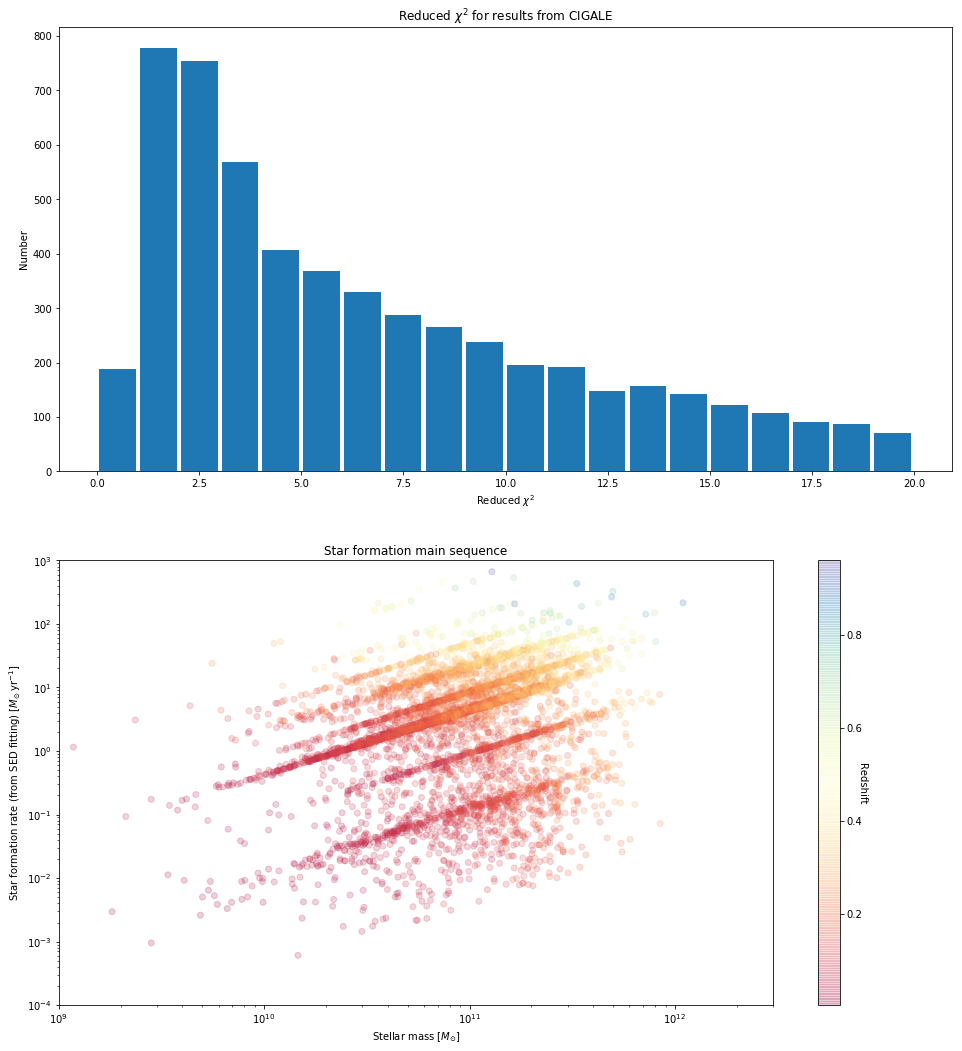

In [5]:
DATA_SEDFITRESULT = DATA_SEDFITRESULT.loc[(DATA_SEDFITRESULT['best.reduced_chi_square'] <= 20)]
print('# of samples = %s'%(len(DATA_SEDFITRESULT)))
plt.figure(figsize=(16, 18))
plt.subplot(211)
plt.hist(DATA_SEDFITRESULT['best.reduced_chi_square'], bins=20, rwidth=0.9)
plt.xlabel(r'Reduced $\chi^2$')
plt.ylabel('Number')
plt.title(r'Reduced $\chi^2$ for results from CIGALE')
plt.subplot(212)
plt.scatter(DATA_SEDFITRESULT['bayes.stellar.m_star'], DATA_SEDFITRESULT['bayes.sfh.sfr'], alpha=0.2, c=DATA_SEDFITRESULT['best.universe.redshift'], cmap=plt.cm.Spectral)
#plt.errorbar(DATA_SEDFITRESULT['bayes.stellar.m_star'], DATA_SEDFITRESULT['bayes.sfh.sfr'], xerr=DATA_SEDFITRESULT['bayes.stellar.m_star_err'], yerr=DATA_SEDFITRESULT['bayes.sfh.sfr_err'], alpha=0.2, fmt='.')
plt.xscale('log')
plt.xlabel(r'Stellar mass $[M_{\odot}]$')
plt.yscale('log')
plt.ylabel(r'Star formation rate (from SED fitting) $[M_{\odot}\,{\rm yr}^{-1}]$')
plt.title('Star formation main sequence')
plt.xlim([1e9, 3e12])
plt.ylim([1e-4, 1e3])
cbar = plt.colorbar()  
cbar.set_label('Redshift', rotation=270) 

In [6]:
DATA_SEDFITRESULT[['best.sfh.sfr']].sort_values(by='best.sfh.sfr', ascending=False)

,best.sfh.sfr
id,
HATLASJ142824.7+013930,657.037094
HATLASJ141724.0+010842,611.609157
HATLASJ144000.9+010740,455.862515
HATLASJ144309.4+013312,436.492091
HATLASJ143926.1+000118,432.834049
HATLASJ143326.1+001533,373.387043
HATLASJ113753.9+012058,351.602825
HATLASJ143257.3+020324,286.264133
HATLASJ090252.4-014803,233.828728
